In [301]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le_employement = LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
os.chdir('/Users/admin/Desktop/AXA')
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
)
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [303]:
df=pd.read_csv('depression_data.csv')

In [5]:
df[df.duplicated(keep=False)].sum().sum()

0.0

In [ ]:
# Feature engineering 

In [305]:
def income_range(Income):
    if Income<20000:
        return 'Low Income'
    elif (Income > 20000) & (Income<100000):
        return 'Standard Income'
    elif Income >100000:
        return 'High Income'
df['Income_Range']=df['Income'].apply(income_range) 
df['Age_bin'] = pd.cut(df['Age'], bins=[-np.inf, 18, 35, 50, 65, np.inf], labels=['Under 18', '18-35', '36-50', '51-65', '65+'])

In [307]:
#df.drop(['Income'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
#df.drop(['Age'], axis=1, inplace=True)
mentality_map = {'Yes': 1, 'No': 0}
df['History of Mental Illness'] = df['History of Mental Illness'].map(mentality_map)

In [231]:
df=df.filter(['Smoking Status', 'Number of Children', 'Employment Status','Family History of Depression',
            'Chronic Medical Conditions','History of Mental Illness' ])

In [233]:
from wolta.data_tools import col_types
types = col_types(df, print_columns=True)

from wolta.data_tools import make_numerics
types = col_types(df)
loc = 0
for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])
    loc += 1

Smoking Status: int64
Number of Children: int64
Employment Status: int64
Family History of Depression: int64
Chronic Medical Conditions: int64
History of Mental Illness: int64


In [235]:
X = df.drop('History of Mental Illness', axis=1)
y = df['History of Mental Illness']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [205]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train1, y_train1 = smt.fit_resample(X_train, y_train)
counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 287943, 1: 125825})
After Counter({0: 230433, 1: 230433})


In [157]:
from imblearn.over_sampling import ADASYN

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
ada = ADASYN()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train1, y_train1 = ada.fit_resample(X_train, y_train)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 287943, 1: 125825})
After Counter({1: 240288, 0: 230433})


In [183]:
from imblearn.combine import SMOTETomek

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train1, y_train1 = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 287943, 1: 125825})
After Counter({0: 230433, 1: 230433})


In [239]:
st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Epoch 1/20
2587/2587 - 9s - 3ms/step - loss: 0.3729 - val_loss: 0.2521
Epoch 2/20
2587/2587 - 7s - 3ms/step - loss: 0.2572 - val_loss: 0.2040
Epoch 3/20
2587/2587 - 5s - 2ms/step - loss: 0.2329 - val_loss: 0.2009
Epoch 4/20
2587/2587 - 6s - 2ms/step - loss: 0.2210 - val_loss: 0.2773
Epoch 5/20
2587/2587 - 5s - 2ms/step - loss: 0.2117 - val_loss: 0.1822
Epoch 6/20
2587/2587 - 6s - 2ms/step - loss: 0.2032 - val_loss: 0.3051
Epoch 7/20
2587/2587 - 6s - 2ms/step - loss: 0.1990 - val_loss: 0.4137
Epoch 8/20
2587/2587 - 6s - 2ms/step - loss: 0.1936 - val_loss: 0.2176
Epoch 9/20
2587/2587 - 6s - 2ms/step - loss: 0.1899 - val_loss: 0.1878
Epoch 10/20
2587/2587 - 6s - 2ms/step - loss: 0.1856 - val_loss: 0.3516
Epoch 11/20
2587/2587 - 6s - 2ms/step - loss: 0.1824 - val_loss: 0.1871
Epoch 12/20
2587/2587 - 5s - 2ms/step - loss: 0.1768 - val_loss: 0.3466
Epoch 13/20
2587/2587 - 6s - 2ms/s

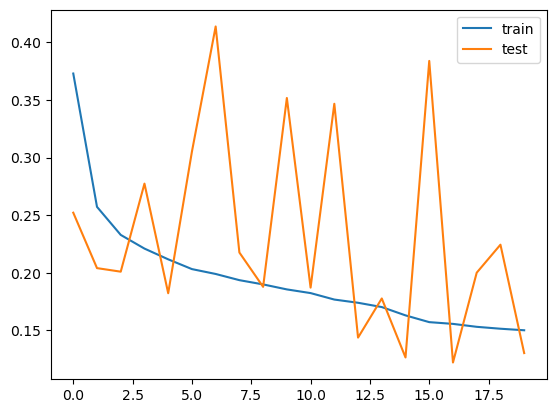

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [243]:

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# number of input columns
n_inputs = X.shape[1]
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
#n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=128, verbose=2, validation_data=(X_test_scaled,X_test_scaled))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')


In [245]:
# encode the train data
X_train_encode = encoder.predict(X_train_scaled)
# encode the test data
X_test_encode = encoder.predict(X_test_scaled)

10345/10345 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
2587/2587 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


# Best Model 

In [251]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
#class_weight={0: 0.745875802821399, 1: 1.5167734975596472}
model = RandomForestClassifier(class_weight={0: 0.745875802821399, 1: 1.5167734975596472})
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
y_hat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, y_hat)
print(acc)

# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

0.6287551054933901
Accuracy: 0.6288
Precision: 0.6378
Recall: 0.6288
F1 Score: 0.6329
Confusion Matrix (original predictions):
[[41054 16456]
 [14266 10978]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.74      0.71      0.73     57510
           1       0.40      0.43      0.42     25244

    accuracy                           0.63     82754
   macro avg       0.57      0.57      0.57     82754
weighted avg       0.64      0.63      0.63     82754

The weighted f1 score for the testing data: 0.6328691673261738


AUC = 0.57


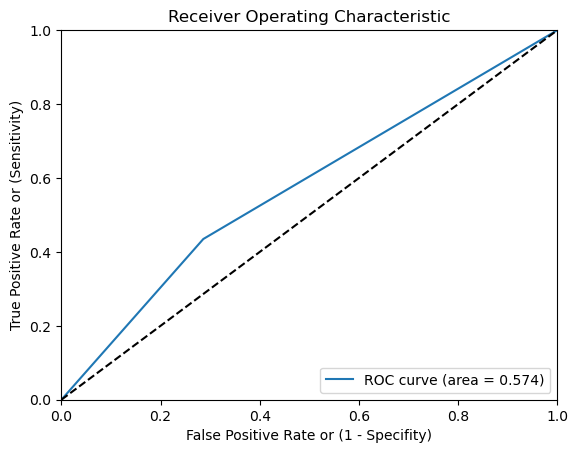

In [253]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
print('AUC = %.2f' % roc_auc_score(y_test, yhat))  #1

metrics.roc_curve(y_hat, y_test)  #2
plt.show()

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
clf = Pipeline([
    ('kernel', Nystroem(kernel='rbf', n_components=300, random_state=42)),
    ('sgd', SGDClassifier(penalty="elasticnet", 
                          alpha=0.0001, l1_ratio=0.15,
                          max_iter=1000, tol=1e-3, 
                          class_weight=class_weight_dict,
                          random_state=42))
])

In [257]:
from sklearn import svm
from sklearn import linear_model
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
est = svm.LinearSVC(loss ='hinge' ,random_state=0,max_iter=1000000, C=1,class_weight=class_weight_dict)

est.fit(X_train_encode, y_train)
y_hat = est.predict(X_test_encode)
# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

Accuracy: 0.5532
Precision: 0.5784
Recall: 0.5532
F1 Score: 0.5637
Confusion Matrix (original predictions):
[[36336 21174]
 [15801  9443]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.70      0.63      0.66     57510
           1       0.31      0.37      0.34     25244

    accuracy                           0.55     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.58      0.55      0.56     82754

The weighted f1 score for the testing data: 0.5637345122384452


In [263]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
# on the transformed data
#DT= DecisionTreeClassifier(criterion="gini", max_depth=30,class_weight='balanced')
#sgd=SGDClassifier(penalty="elasticnet", alpha=0.0001, l1_ratio=0.15,max_iter=1000, tol=1e-3, class_weight=class_weight_dict,random_state=42)
#rfc = RandomForestClassifier(class_weight={0: 0.745875802821399, 1: 1.5167734975596472},max_features='sqrt')
#class_weight={0: 0.745875802821399, 1: 1.5167734975596472}
lr = LogisticRegression(class_weight=class_weight_dict)
# Fit the classifier
lr.fit(X_train_encode, y_train)
# Make predictions
y_hat = lr.predict(X_test_encode)

# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

Accuracy: 0.5334
Precision: 0.5869
Recall: 0.5334
F1 Score: 0.5508
Confusion Matrix (original predictions):
[[32488 25022]
 [13589 11655]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.71      0.56      0.63     57510
           1       0.32      0.46      0.38     25244

    accuracy                           0.53     82754
   macro avg       0.51      0.51      0.50     82754
weighted avg       0.59      0.53      0.55     82754

The weighted f1 score for the testing data: 0.5507500687813562


AUC = 0.57


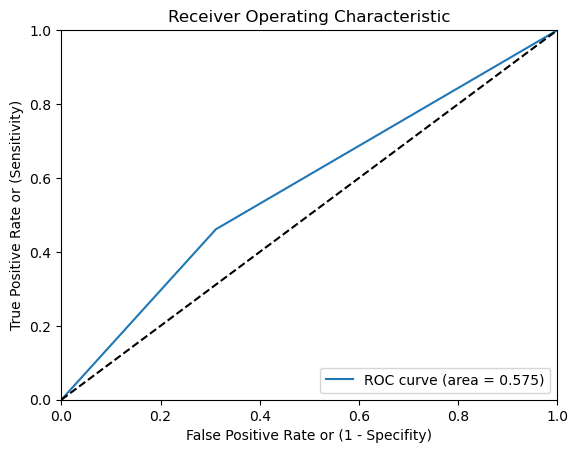

In [273]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
print('AUC = %.2f' % roc_auc_score(y_test, y_hat))  #1

metrics.roc_curve(y_prede, y_hat)  #2
plt.show()

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Best Recall Model 

In [105]:
from catboost import CatBoostClassifier, Pool

In [287]:
# Define a list containing the names of important categorical features in the dataset 
Cat_Features = ['Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Substance Abuse','Family History of Depression', 'Chronic Medical Conditions']
       

# Define the target name in a variable for simplicity
Target = 'History of Mental Illness'

In [289]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

In [293]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

  # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df           


In [295]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

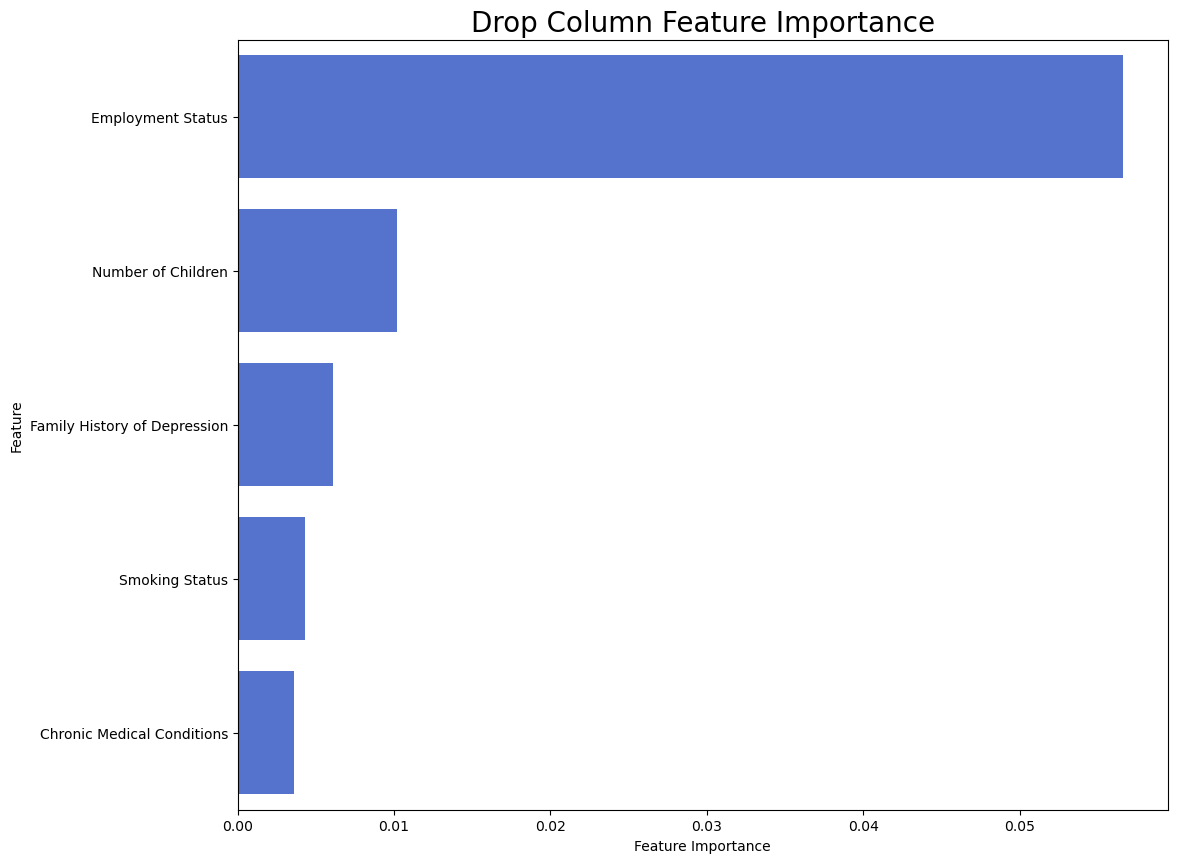

In [297]:
# Initialize the CNB classifier
import seaborn as sns
from sklearn.base import clone 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import ComplementNB, BernoulliNB
cnb = ComplementNB()
# Call drop_column_importance_plot
drop_column_importance_plot(cnb, X_train, y_train)

IndexError: index 2 is out of bounds for axis 0 with size 2

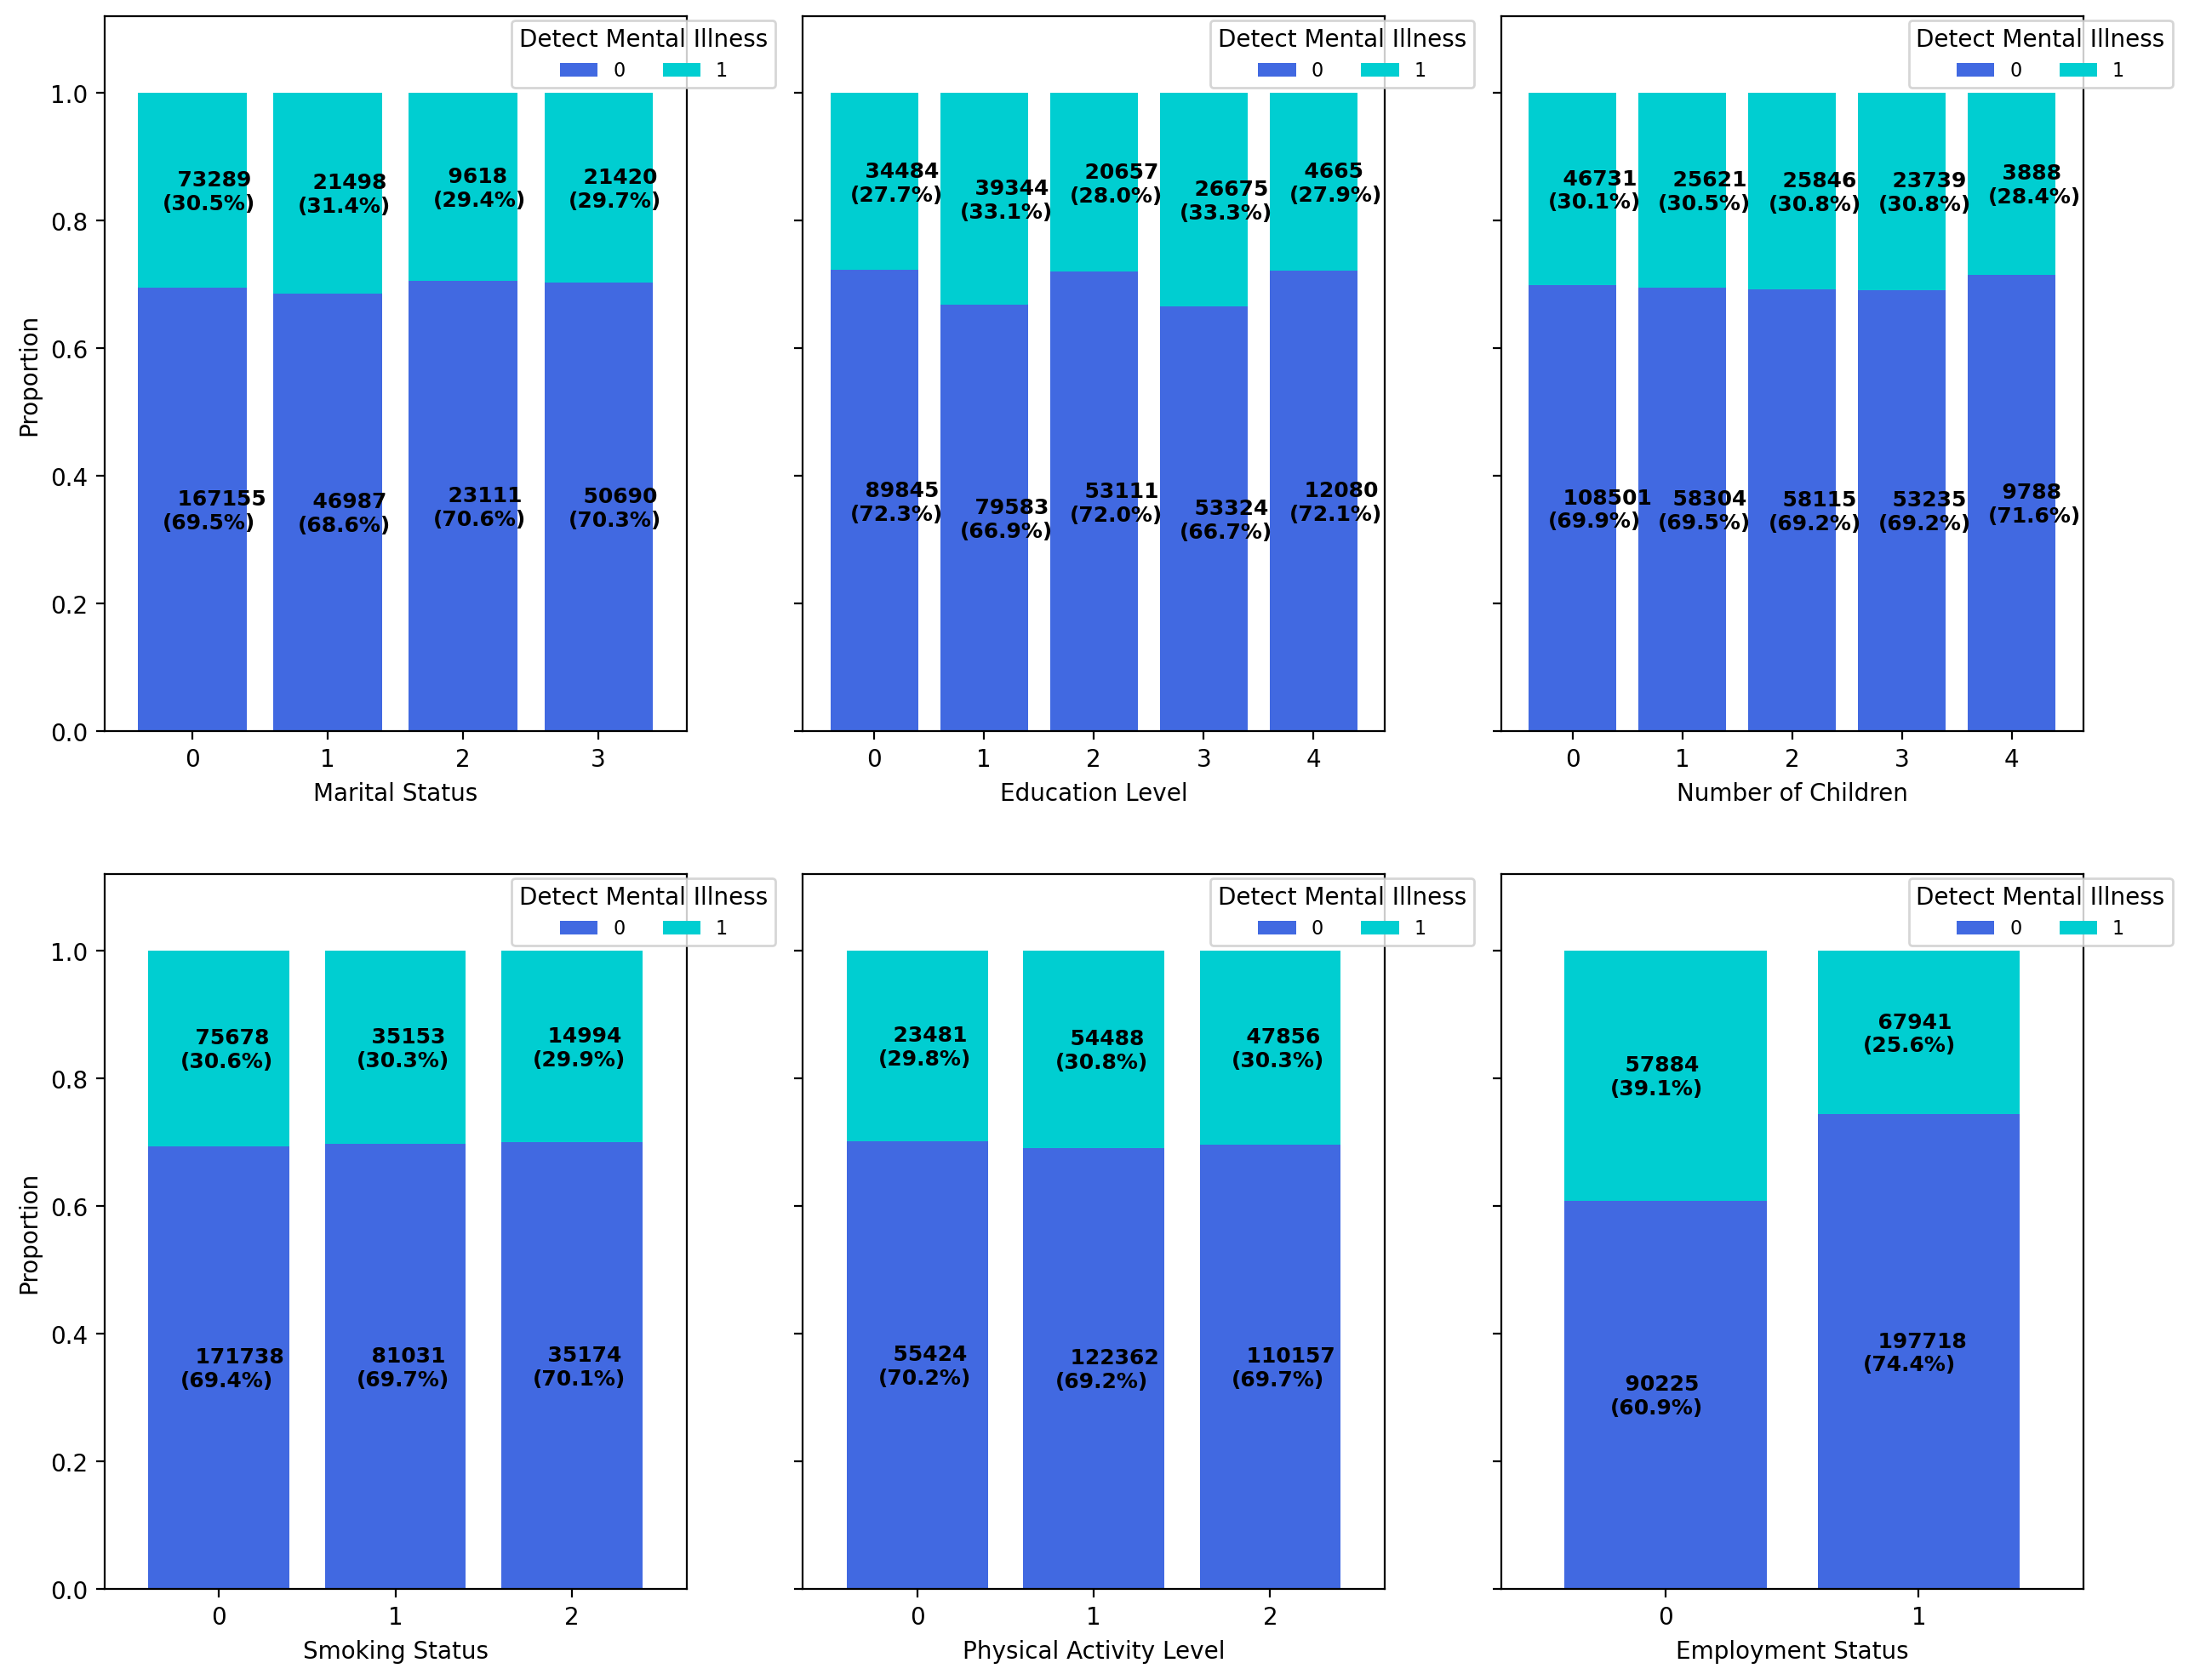

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Detect Mental Illness', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

In [299]:
df.columns

Index(['Smoking Status', 'Number of Children', 'Employment Status',
       'Family History of Depression', 'Chronic Medical Conditions',
       'History of Mental Illness'],
      dtype='object')